<a href="https://colab.research.google.com/github/ShivamSingh8853/Cat-v-s-Dog/blob/main/Cat_v_s_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:07<00:00, 191MB/s]
100% 1.06G/1.06G [00:07<00:00, 143MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
train_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model= Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 71s 108ms/step - loss: 1.1253 - accuracy: 0.6242 - val_loss: 0.5819 - val_accuracy: 0.6894
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5405 - accuracy: 0.7290 - val_loss: 0.5574 - val_accuracy: 0.7084
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4687 - accuracy: 0.7792 - val_loss: 0.6177 - val_accuracy: 0.6848
Epoch 4/10
625/625 [==============================] - 80s 127ms/step - loss: 0.4165 - accuracy: 0.8126 - val_loss: 0.5359 - val_accuracy: 0.7460
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3383 - accuracy: 0.8511 - val_loss: 0.6759 - val_accuracy: 0.7554
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2643 - accuracy: 0.8874 - val_loss: 0.5326 - val_accuracy: 0.8026
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.1881 - accuracy: 0.9270 - val_loss: 0.6322 - val_ac

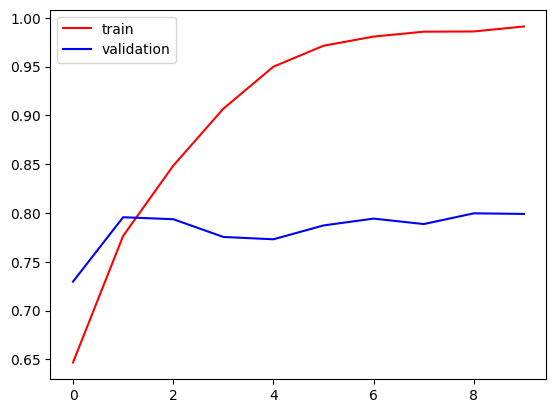

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

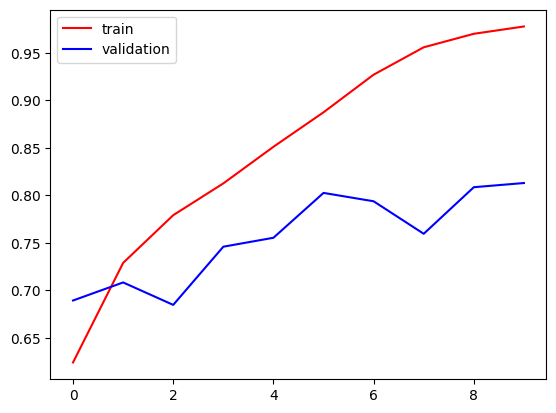

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2


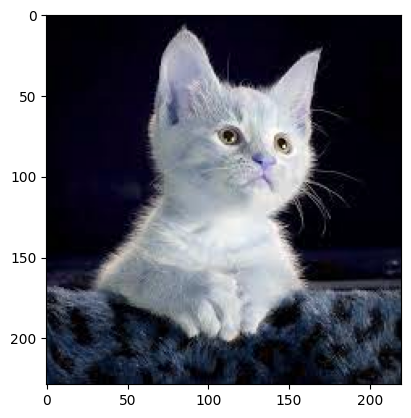

In [ ]:
test_img=cv2.imread('/content/cat.jfif')
plt.imshow(test_img)

In [ ]:
test_img.shape

(229, 220, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 260ms/step


array([[0.]], dtype=float32)

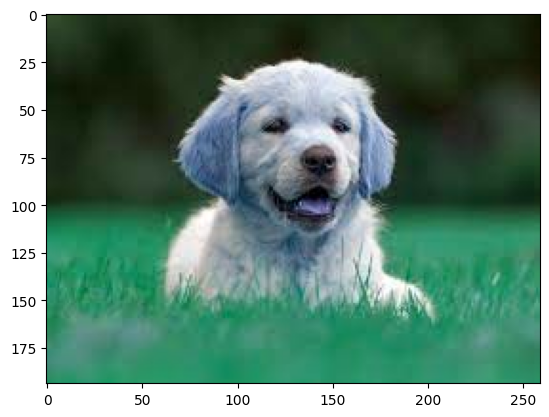

In [ ]:
test_img=cv2.imread('/content/dog.jfif')
plt.imshow(test_img)

In [ ]:
test_img.shape

(194, 259, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))



In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 21ms/step


array([[1.]], dtype=float32)